In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading Data

In [2]:
df = pd.read_csv("./Fraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df = df.head(500000)

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
499995,20,CASH_OUT,77616.32,C1125584113,402794.6,325178.28,C596605403,662541.78,410073.66,0,0
499996,20,CASH_OUT,63262.20,C1632642338,8500.0,0.00,C1989325178,0.00,63262.20,0,0
499997,20,PAYMENT,15019.29,C2105678886,5253.0,0.00,M171574465,0.00,0.00,0,0
499998,20,TRANSFER,355628.70,C1907483123,0.0,0.00,C1880058411,6533824.07,6889452.78,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
 10  isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 42.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.0
mean,13.906728,1.663937e+05,9.116928e+05,9.314261e+05,9.827739e+05,1.162668e+06,0.000466,0.0
std,3.731891,2.725841e+05,3.016901e+06,3.054015e+06,2.336426e+06,2.510610e+06,0.021582,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.335032e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.137560e+04,1.856900e+04,0.000000e+00,1.192711e+05,2.221441e+05,0.000000,0.0
75%,17.000000,2.226441e+05,1.702941e+05,2.101716e+05,8.962267e+05,1.201403e+06,0.000000,0.0
max,20.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    500000
Name: count, dtype: int64

In [9]:
# very imbalanced column, so we drop it
df = df.drop("isFlaggedFraud", axis=1)

In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
499995,20,CASH_OUT,77616.32,C1125584113,402794.6,325178.28,C596605403,662541.78,410073.66,0
499996,20,CASH_OUT,63262.20,C1632642338,8500.0,0.00,C1989325178,0.00,63262.20,0
499997,20,PAYMENT,15019.29,C2105678886,5253.0,0.00,M171574465,0.00,0.00,0
499998,20,TRANSFER,355628.70,C1907483123,0.0,0.00,C1880058411,6533824.07,6889452.78,0


### Data Visualization

<Axes: >

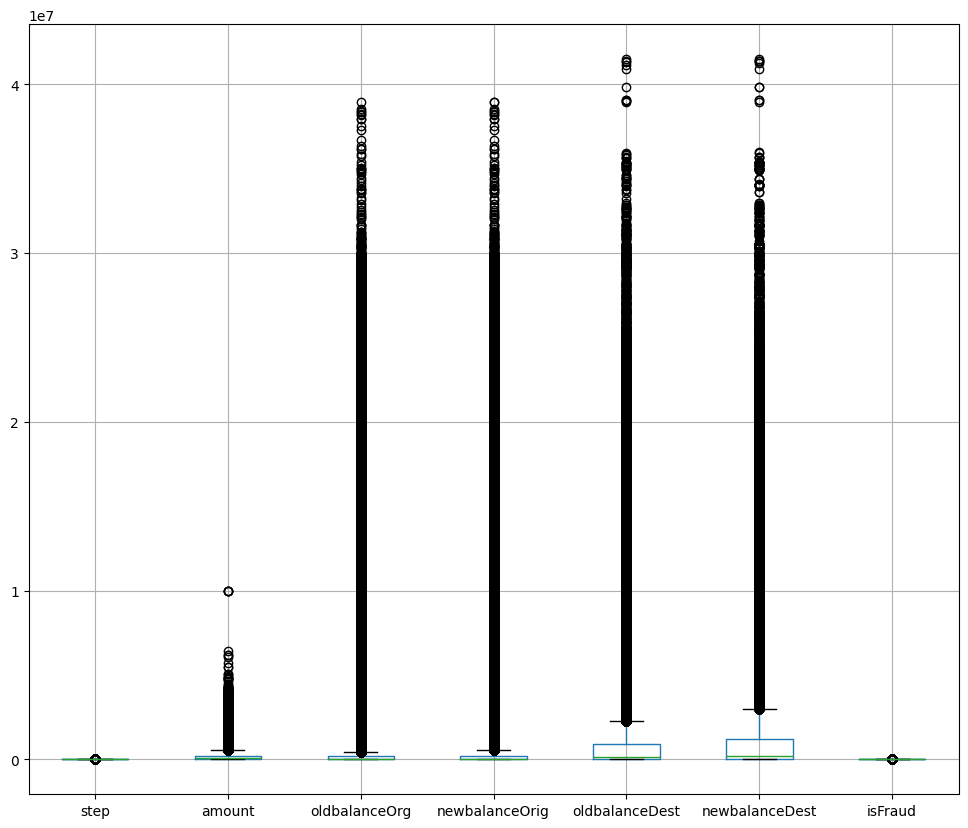

In [11]:
df.boxplot(figsize=(12, 10))

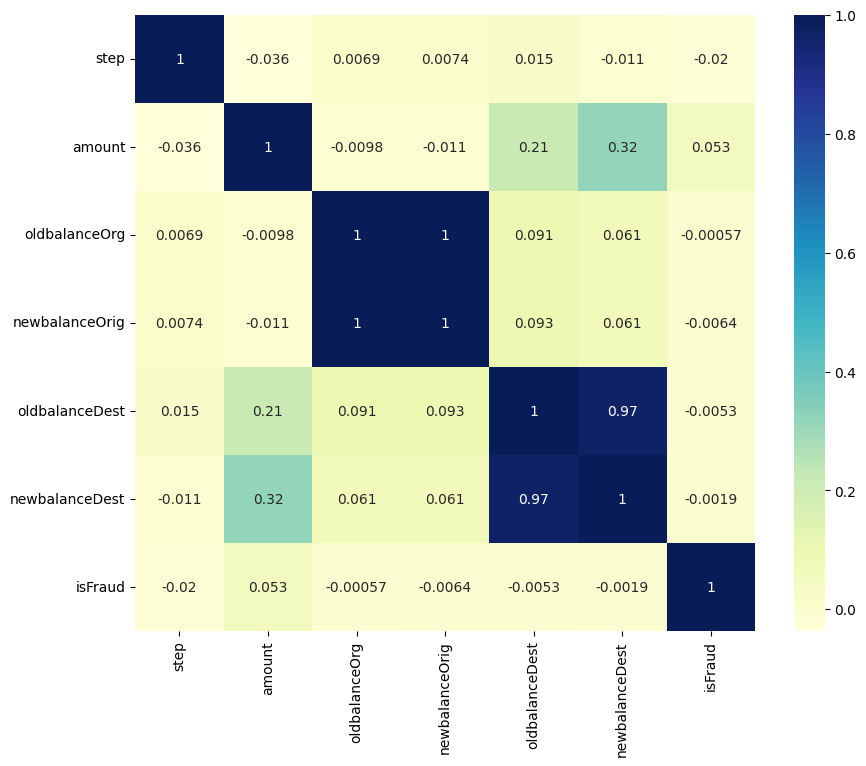

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="YlGnBu")
plt.show()

In [13]:
# due high Multicollinearity we will drop oldbalance data beacuse instead of that columns we can make use of newbalance data
df.drop(columns=['oldbalanceDest', 'oldbalanceOrg'], inplace=True)

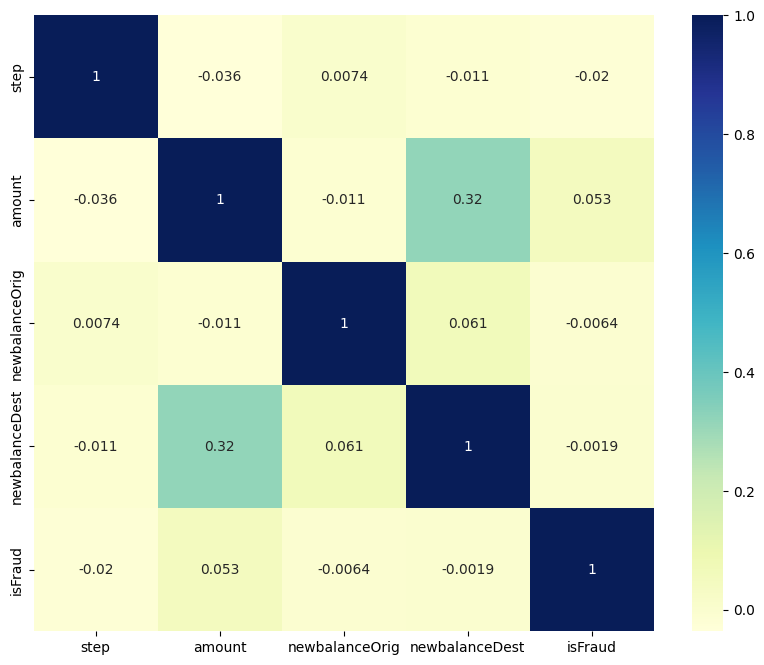

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="YlGnBu")
plt.show()

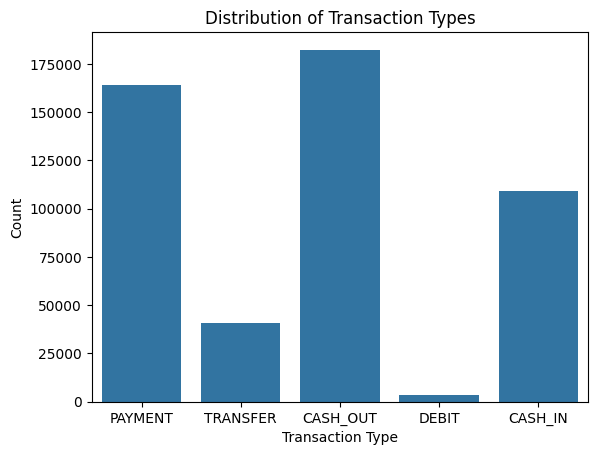

In [15]:
# Distribution of Transaction Types
sns.countplot(data=df, x="type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Transaction Types")
plt.show()

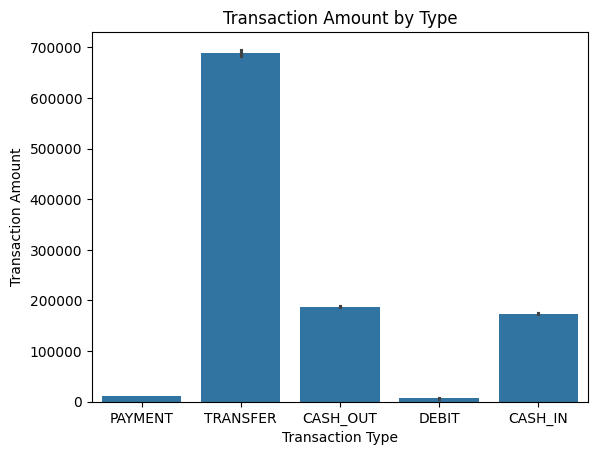

In [16]:
# the highest transaction amount is transfered by TRANSFER type
sns.barplot(data=df, x="type", y="amount")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount by Type")
plt.show()

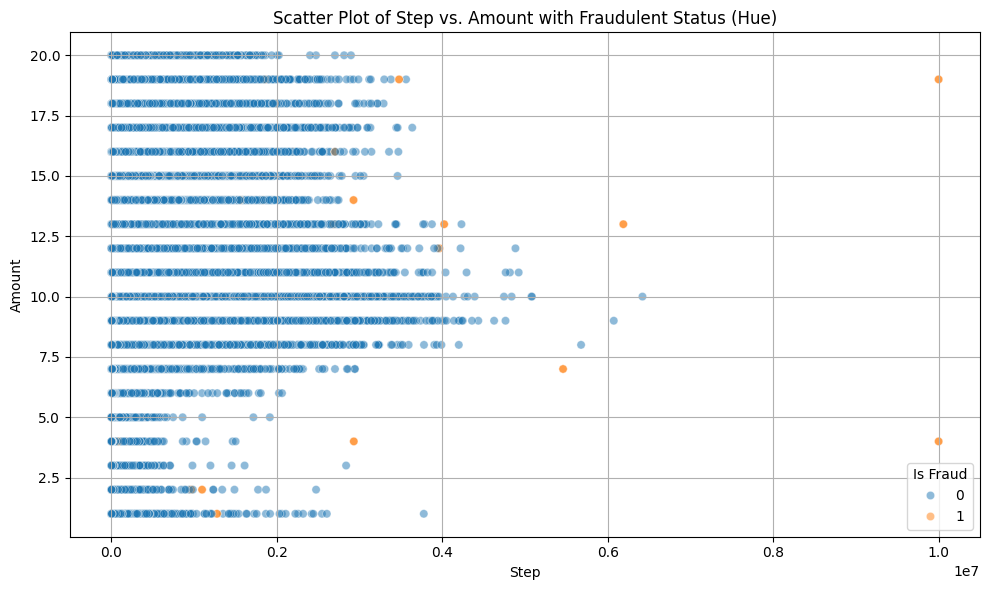

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='step', hue='isFraud', alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Scatter Plot of Step vs. Amount with Fraudulent Status (Hue)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Is Fraud')
plt.show()

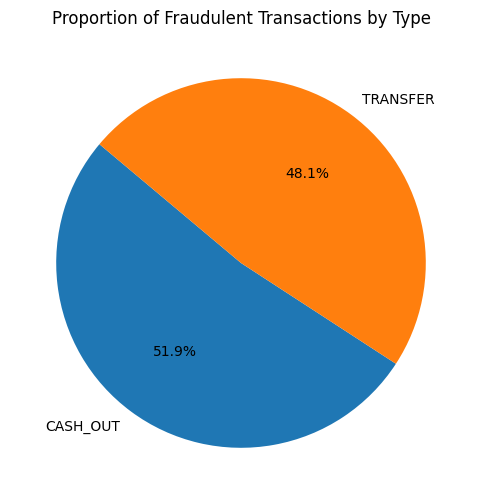

In [18]:
# Fraud transaction is happend by two types only 'TRANSFER' and 'CASH_OUT'
fraud_proportions = df[df["isFraud"] == 1]["type"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_proportions, labels=fraud_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Fraudulent Transactions by Type')
plt.show()

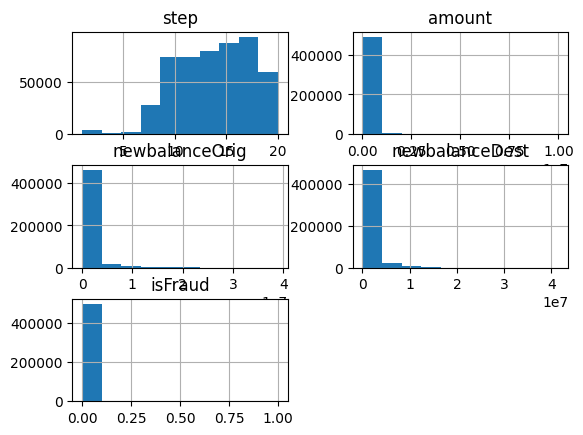

In [19]:
df.hist()
plt.show()

### Encoding and Scaling

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'newbalanceOrig', 'nameDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [21]:
df = pd.get_dummies(df, columns=["type"], prefix="type")
df.shape

(500000, 12)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["nameOrig"] = le.fit_transform(df["nameOrig"])
df["nameDest"] = le.fit_transform(df["nameDest"])

In [23]:
df.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,59872,160296.36,134004,0.0,0,False,False,False,True,False
1,1,1864.28,172096,19384.72,139396,0.0,0,False,False,False,True,False
2,1,181.00,78797,0.00,38975,0.0,1,False,False,False,False,True
3,1,181.00,458587,0.00,34721,0.0,1,False,True,False,False,False
4,1,11668.14,270646,29885.86,70167,0.0,0,False,False,False,True,False


In [24]:
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Model
- First we will use svm
- Second we will use neural networks

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [27]:
svm_model = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
svm_model.fit(X_train, y_train)

train_pred = svm_model.predict(X_train)
test_pred = svm_model.predict(X_test)

print(f"Accuracy on train set: {accuracy_score(y_train, train_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, test_pred)}")

In [28]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Predictions
predictions = model.predict(X_test)
threshold = 0.5  
predictions_binary = (predictions > threshold).astype(int)




Epoch 1/10


11250/11250 [==============================] - 29s 2ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 2/10
11250/11250 [==============================] - 26s 2ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 3/10
11250/11250 [==============================] - 25s 2ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 4/10
11250/11250 [==============================] - 25s 2ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 5/10
11250/11250 [==============================] - 23s 2ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 6/10
11250/11250 [==============================] - 26s 2ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 7/10
11250/11250 [==============================] - 27s 2ms/step - loss: 0.0025 - accuracy: 0.9996 - val_lo